In [1]:
from bs4 import BeautifulSoup
import requests
import json

In [2]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

In [3]:
html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"

In [4]:
soup = BeautifulSoup(html, 'html5lib')

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>


In [6]:
tag_object = soup.title
print('tag_object:', tag_object)

tag_object: <title>Page Title</title>


In [7]:
print(type(tag_object))

<class 'bs4.element.Tag'>


### Tag_object

In [8]:
tag_object = soup.h3
tag_object

<h3><b id="boldest">Lebron James</b></h3>

# Children, Parents, and Siblings

### Tag_child

In [9]:
tag_child = tag_object.b
tag_child

<b id="boldest">Lebron James</b>

### Parent_tag

In [10]:
parent_tag = tag_child.parent
parent_tag

<h3><b id="boldest">Lebron James</b></h3>

In [11]:
tag_object.parent

<body><h3><b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body>

### Siblings

In [12]:
sibling_1 = tag_object.next_sibling
sibling_1

<p> Salary: $ 92,000,000 </p>

In [13]:
sibling_2 = sibling_1.next_sibling
sibling_2

<h3> Stephen Curry</h3>

In [14]:
sibling_3 = sibling_2.next_sibling
sibling_3

<p> Salary: $85,000, 000 </p>

# HTML Attributes

In [15]:
tag_child['id']

'boldest'

In [16]:
tag_child.get('id')

'boldest'

In [17]:
tag_child.attrs

{'id': 'boldest'}

# Navigable string

In [18]:
tag_string = tag_child.string
tag_string

'Lebron James'

In [19]:
type(tag_string)

bs4.element.NavigableString

In [20]:
# converting Navigablestring into string object in python
unicode_string = str(tag_string)
type(unicode_string)

str

# Filter
- Filters allow you to find complex patterns, the simplest filter is a string. In this section we will pass a string to a different filter method and Beautiful Soup will perform a match against that exact string. Consider the following HTML of rocket launchs:

In [21]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


In [22]:
table="<table><tr><td id='flight'>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"

In [23]:
table_bs= BeautifulSoup(table, 'html5lib')

# Find All
- The find_all() method looks through a tag’s descendants and retrieves all descendants that match your filters.

- The Method signature for find_all(name, attrs, recursive, string, limit, **kwargs)

### Name

In [24]:
table_rows = table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>]

In [25]:
first_row=table_rows[0]

In [26]:
type(first_row)

bs4.element.Tag

In [27]:
first_row.td

<td id="flight">Flight No</td>

In [28]:
for i, row in enumerate(table_rows):
    print('row', i, 'is', row)

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>


In [29]:
for i, row in enumerate(table_rows):
    print('row', i)
    cells = row.find_all('td')
    for j, cell in enumerate(cells):
        print('column',j, 'cell', cell)

row 0
column 0 cell <td id="flight">Flight No</td>
column 1 cell <td>Launch site</td>
column 2 cell <td>Payload mass</td>
row 1
column 0 cell <td>1</td>
column 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td>
column 2 cell <td>300 kg</td>
row 2
column 0 cell <td>2</td>
column 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
column 2 cell <td>94 kg</td>
row 3
column 0 cell <td>3</td>
column 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td>
column 2 cell <td>80 kg</td>


In [30]:
list_input = table_bs.find_all(name=['tr', 'td'])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td>,
 <td>80 kg</td>]

## Attributes

In [31]:
table_bs.find_all(id='flight')

[<td id="flight">Flight No</td>]

In [32]:
list_input = table_bs.find_all(href='https://en.wikipedia.org/wiki/Florida')
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

In [33]:
table_bs.find_all(href=True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

In [34]:
table_bs.find_all(href=False)

[<html><head></head><body><table><tbody><tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr><tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr></tbody></table></body></html>,
 <head></head>,
 <body><table><tbody><tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr><tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr></tbody></table></body>,
 <table><tbody><tr><td id="flight">Flight No</td><td>Launch site</td> <t

In [35]:
soup.find_all(id='boldest')

[<b id="boldest">Lebron James</b>]

## Find

In [36]:
%%html
<h3>Rocket Launch </h3>

<p>
<table class ='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>
  
    
<table class ='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td> 
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>


Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg
Pizza Place,Orders,Slices
Domino's Pizza,10,100
Little Caesars,12,144
Papa John's,15,165


In [37]:
two_tables="<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

In [38]:
two_tables_bs = BeautifulSoup(two_tables, 'html.parser')

In [39]:
two_tables_bs.find('table',class_ ='rocket')

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

# Downloading And Scraping The Contents Of A Web Page

In [40]:
# we download the contents of the url
url = "http://www.ibm.com"

In [41]:
# we use get to download the contents of the webpage in text format and store in a variable called data
data = requests.get(url).text

In [42]:
#we create BeautifulSoup object using the BeautifulSoup constructor
soup= BeautifulSoup(data, 'html5lib')

- scrape all links

In [43]:
for link in soup.find_all('a', href=True): # in html anchor/link is represented by the tag <a>
    print(link.get('href'))
    

#main-content
http://www.ibm.com
https://www.ibm.com/cloud/cloud-pak-for-business-automation?lnk=ushpv18l1
https://www.ibm.com/blogs/systems/red-hat-openshift-momentum-on-ibm-z-linuxone/?lnk=ushpv18f1
https://www.ibm.com/cloud/watson-assistant?lnk=ushpv18f2
https://www.ibm.com/thought-leadership/institute-business-value/report/open-hybrid-multicloud-government?lnk=ushpv18f3
https://www.ibm.com/blogs/blockchain/2021/07/brewing-a-more-traceable-and-sustainable-beer-industry-with-blockchain/?lnk=ushpv18f4
https://www.ibm.com/products/offers-and-discounts?link=ushpv18t5&lnk2=trial_mktpl_MPDISC
https://www.ibm.com/cloud/watson-discovery?lnk=ushpv18t1&lnk2=trial_WatDiscovery&psrc=none&pexp=def
https://www.ibm.com/products/planning-analytics?lnk=ushpv18t2&lnk2=trial_PlanningAnalytics&psrc=none&pexp=def
https://www.ibm.com/cloud/aspera?lnk=ushpv18t3&lnk2=trial_AsperaCloud&psrc=none&pexp=def
https://www.ibm.com/cloud/watson-studio?lnk=ushpv18t4&lnk2=trial_WatStudio&psrc=none&pexp=def
https://ww

- scrape all images Tags

In [44]:
link_img = soup.find_all('img')
for link in link_img:
    print(link)
    print(link.get('src'))


data:image/svg+xml;base64,PHN2ZyB3aWR0aD0iMTA1NSIgaGVpZ2h0PSI1MjcuNSIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIiB2ZXJzaW9uPSIxLjEiLz4=
<img alt="leadspace mobile image" class="ibm-resize" decoding="async" src="https://1.dam.s81c.com/public/content/dam/worldwide-content/homepage/ul/g/94/0f/202100705-AI-Automation-Cloud-Pak-mobile-720x360.jpg" style="position:absolute;top:0;left:0;bottom:0;right:0;box-sizing:border-box;padding:0;border:none;margin:auto;display:block;width:0;height:0;min-width:100%;max-width:100%;min-height:100%;max-height:100%"/>
https://1.dam.s81c.com/public/content/dam/worldwide-content/homepage/ul/g/94/0f/202100705-AI-Automation-Cloud-Pak-mobile-720x360.jpg

data:image/svg+xml;base64,PHN2ZyB3aWR0aD0iNDQwIiBoZWlnaHQ9IjMyMCIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIiB2ZXJzaW9uPSIxLjEiLz4=
<img alt="Expand your workload possibilities" class="ibm-resize ibm-ab-image featured-image" decoding="async" src="https://1.dam.s81c.com/public/content/dam/worldwide-content/

In [45]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

In [46]:
data = requests.get(url).text

In [47]:
soup = BeautifulSoup(data, 'html5lib')

In [48]:
table = soup.find('table') # in html, table is represented by <table>

In [49]:
#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].string # store the value in column 3 as color_name
    color_code = cols[3].string # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_code))

Color Name--->None
lightsalmon--->#FFA07A
salmon--->#FA8072
darksalmon--->#E9967A
lightcoral--->#F08080
coral--->#FF7F50
tomato--->#FF6347
orangered--->#FF4500
gold--->#FFD700
orange--->#FFA500
darkorange--->#FF8C00
lightyellow--->#FFFFE0
lemonchiffon--->#FFFACD
papayawhip--->#FFEFD5
moccasin--->#FFE4B5
peachpuff--->#FFDAB9
palegoldenrod--->#EEE8AA
khaki--->#F0E68C
darkkhaki--->#BDB76B
yellow--->#FFFF00
lawngreen--->#7CFC00
chartreuse--->#7FFF00
limegreen--->#32CD32
lime--->#00FF00
forestgreen--->#228B22
green--->#008000
powderblue--->#B0E0E6
lightblue--->#ADD8E6
lightskyblue--->#87CEFA
skyblue--->#87CEEB
deepskyblue--->#00BFFF
lightsteelblue--->#B0C4DE
dodgerblue--->#1E90FF


# Scrape data from html tables into a DataFrame using BeautifulSoup and Pandas 

In [61]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [62]:
url = 'https://en.wikipedia.org/wiki/World_population'

In [63]:
data = requests.get(url).text

In [64]:
soup = BeautifulSoup(data, 'html5lib')

In [65]:
# find all html tables in the web page

tables = soup.find_all('table')

In [66]:
len(tables)

26

Assume that we are looking for the 10 most densly populated countries table, we can look through the tables list and find the right one we are look for based on the data in each table or we can search for the table name if it is in the table but this option might not always work.

In [67]:
for index,table in enumerate(tables):
    if ("Countries ranking highly in both total population" in str(table)):
        table_index = index
print(table_index)

6


In [68]:
print(tables[table_index].prettify())

<table class="wikitable sortable" style="text-align:right">
 <caption>
  Countries ranking highly in both total population
  <small>
   (more than 20 million people)
  </small>
  and population density
  <small>
   (more than 250 people per square kilometer)
  </small>
  :
 </caption>
 <tbody>
  <tr>
   <th>
    Rank
   </th>
   <th>
    Country
   </th>
   <th>
    Population
   </th>
   <th>
    Area
    <br/>
    <small>
     (km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
   <th>
    Density
    <br/>
    <small>
     (pop/km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
   <th>
    Population trend
   </th>
  </tr>
  <tr>
   <td>
    1
   </td>
   <td align="left">
    <span class="flagicon">
     <img alt="" class="thumbborder" data-file-height="900" data-file-width="1350" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/23px-Flag_of_India.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/4/4

In [69]:
print(tables[6].tbody.find_all('tr')[1].text)


1
 India
1,380,420,000

3,287,240

420
Growing



In [76]:
population_data = pd.DataFrame(columns =['Rank', 'Country', 'Population', 'Area', 'Density', 'Population trend'])
for row in tables[6].tbody.find_all('tr'):
    col = row.find_all('td')
    if col!=[]:
        rank = col[0].text
        Country = col[1].text
        population = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()
        population_trend = col[5].text
        population_data = population_data.append({'Rank':rank,'Country': Country, 'Population':population,
                                             'Area':area,'Density':density, 'Population trend':population_trend}, ignore_index=True)
population_data    

,Rank,Country,Population,Area,Density,Population trend
0,1,India,"1,380,420,000","3,287,240",420,Growing\n
1,2,Pakistan,"224,580,000","803,940",279,Rapidly growing\n
2,3,Bangladesh,"171,150,000","143,998","1,189",Rapidly growing\n
3,4,Japan,"126,010,000","377,873",333,Declining[98]\n
4,5,Philippines,"110,600,000","300,000",369,Growing\n
5,6,Vietnam,"96,209,000","331,689",290,Growing\n
6,7,United Kingdom,"66,436,000","243,610",273,Growing\n
7,8,South Korea,"51,781,000","99,538",520,Steady\n
8,9,Taiwan,"23,604,000","36,193",652,Steady\n
9,10,Sri Lanka,"21,803,000","65,610",332,Growing\n


In [77]:
population_data = pd.DataFrame(columns=["Rank", "Country", "Population", "Area", "Density"])

for row in tables[5].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        rank = col[0].text
        country = col[1].text
        population = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()
        population_data = population_data.append({"Rank":rank, "Country":country, "Population":population, "Area":area, "Density":density, }, ignore_index=True)

population_data

,Rank,Country,Population,Area,Density
0,1,Singapore,"5,704,000",710,"8,033"
1,2,Bangladesh,"171,150,000","143,998","1,189"
2,3,Lebanon,"6,856,000","10,452",656
3,4,Taiwan,"23,604,000","36,193",652
4,5,South Korea,"51,781,000","99,538",520
5,6,Rwanda,"12,374,000","26,338",470
6,7,Haiti,"11,578,000","27,065",428
7,8,Netherlands,"17,620,000","41,526",424
8,9,Israel,"9,380,000","22,072",425
9,10,India,"1,380,420,000","3,287,240",420


In [176]:

df = pd.DataFrame(columns = ['Year', 'Population', 'y_grosth_%', 'y_growth_num', 'density', 'urban_po_num', 'urban_po_%'])
for row in tables[7].tbody.find_all('tr'):
    cols = row.find_all('td')
    if cols!=[]:
        Year = cols[0].text
        population = cols[1].text.strip()
        y_growth_per = cols[2].text.strip()
        y_growth_num = cols[3].text.strip()
        density = cols[4].text.strip()
        urban_po_num = cols[5].text.strip()
        df = df.append({'Year':Year, 'Population':population, 'y_grosth_%':y_growth_per,
                        'y_growth_num':y_growth_num, 'density':density,
                        'urban_po_num':urban_po_num}, ignore_index=True)
df      

,Year,Population,y_grosth_%,y_growth_num,density,urban_po_num,urban_po_%
0,"2,584,034,261\n",1.88%,"47,603,112",17,"775,067,697",30%,NaN
1,"2,630,861,562\n",1.81%,"46,827,301",18,"799,282,533",30%,NaN
2,"2,677,608,960\n",1.78%,"46,747,398",18,"824,289,989",31%,NaN
3,"2,724,846,741\n",1.76%,"47,237,781",18,"850,179,106",31%,NaN
4,"2,773,019,936\n",1.77%,"48,173,195",19,"877,008,842",32%,NaN
...,...,...,...,...,...,...,...
65,"7,464,022,000\n",1.14%,"84,225,000",50,"4,060,653,000",54%,NaN
66,"7,547,859,000\n",1.12%,"83,837,000",51,"4,140,189,000",55%,NaN
67,"7,631,091,000\n",1.10%,"83,232,000",51,"4,219,817,000",55%,NaN
68,"7,713,468,000\n",1.08%,"82,377,000",52,"4,299,439,000",56%,NaN


In [177]:
df.head()

,Year,Population,y_grosth_%,y_growth_num,density,urban_po_num,urban_po_%
0,"2,584,034,261\n",1.88%,"47,603,112",17,"775,067,697",30%,NaN
1,"2,630,861,562\n",1.81%,"46,827,301",18,"799,282,533",30%,NaN
2,"2,677,608,960\n",1.78%,"46,747,398",18,"824,289,989",31%,NaN
3,"2,724,846,741\n",1.76%,"47,237,781",18,"850,179,106",31%,NaN
4,"2,773,019,936\n",1.77%,"48,173,195",19,"877,008,842",32%,NaN


In [178]:
pd.read_html(str(tables[7]), flavor='bs4')

[    Year  Population Yearly growth           Density(pop/km2)  \
     Year  Population             %    Number Density(pop/km2)   
 0   1951  2584034261         1.88%  47603112               17   
 1   1952  2630861562         1.81%  46827301               18   
 2   1953  2677608960         1.78%  46747398               18   
 3   1954  2724846741         1.76%  47237781               18   
 4   1955  2773019936         1.77%  48173195               19   
 ..   ...         ...           ...       ...              ...   
 65  2016  7464022000         1.14%  84225000               50   
 66  2017  7547859000         1.12%  83837000               51   
 67  2018  7631091000         1.10%  83232000               51   
 68  2019  7713468000         1.08%  82377000               52   
 69  2020  7795000000         1.05%  81331000               52   
 
    Urban population       
              Number    %  
 0         775067697  30%  
 1         799282533  30%  
 2         824289989  31%  


In [179]:
population_data_read_html = pd.read_html(str(tables[7]), flavor='bs4')[0]
population_data_read_html

Year  Population Yearly growth           Density(pop/km2)  \
    Year  Population             %    Number Density(pop/km2)   
0   1951  2584034261         1.88%  47603112               17   
1   1952  2630861562         1.81%  46827301               18   
2   1953  2677608960         1.78%  46747398               18   
3   1954  2724846741         1.76%  47237781               18   
4   1955  2773019936         1.77%  48173195               19   
..   ...         ...           ...       ...              ...   
65  2016  7464022000         1.14%  84225000               50   
66  2017  7547859000         1.12%  83837000               51   
67  2018  7631091000         1.10%  83232000               51   
68  2019  7713468000         1.08%  82377000               52   
69  2020  7795000000         1.05%  81331000               52   

   Urban population       
             Number    %  
0         775067697  30%  
1         799282533  30%  
2         824289989  31%  
3         850179106  31%  
4         877008842  32%  
..              ...  ...  
65       4060653000  54%  
66       4140189000  55%  
67       4219817000  55%  
68       4299439000  56%  
69       4378900000  56%  

[70 rows x 7 columns]

In [180]:
population_data_read_html.columns

MultiIndex([(            'Year',             'Year'),
            (      'Population',       'Population'),
            (   'Yearly growth',                '%'),
            (   'Yearly growth',           'Number'),
            ('Density(pop/km2)', 'Density(pop/km2)'),
            ('Urban population',           'Number'),
            ('Urban population',                '%')],
           )

In [181]:
population_data_read_html.columns = ['Year', 'Population','Yearly growth %', 'Yearly growth num', 'Density(pop/km2)', 'Urban population num', 'Urban population %']

In [182]:
population_data_read_html

,Year,Population,Yearly growth %,Yearly growth num,Density(pop/km2),Urban population num,Urban population %
0,1951,2584034261,1.88%,47603112,17,775067697,30%
1,1952,2630861562,1.81%,46827301,18,799282533,30%
2,1953,2677608960,1.78%,46747398,18,824289989,31%
3,1954,2724846741,1.76%,47237781,18,850179106,31%
4,1955,2773019936,1.77%,48173195,19,877008842,32%
...,...,...,...,...,...,...,...
65,2016,7464022000,1.14%,84225000,50,4060653000,54%
66,2017,7547859000,1.12%,83837000,51,4140189000,55%
67,2018,7631091000,1.10%,83232000,51,4219817000,55%
68,2019,7713468000,1.08%,82377000,52,4299439000,56%


In [183]:
pdrh = population_data_read_html

In [184]:
pdrh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  70 non-null     int64 
 1   Population            70 non-null     int64 
 2   Yearly growth %       70 non-null     object
 3   Yearly growth num     70 non-null     int64 
 4   Density(pop/km2)      70 non-null     int64 
 5   Urban population num  70 non-null     int64 
 6   Urban population %    70 non-null     object
dtypes: int64(5), object(2)
memory usage: 4.0+ KB


In [142]:
tables[7].tbody.find_all('tr')[70].contents[11].text[:-1]

'4,299,439,000'

# Extracting stock data using python library

In [186]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23914 sha256=0873619b1fc62557c7b2de1ff79200c3d54f012abb24eb24ed47a97e48f56485
  Stored in directory: c:\users\belma\appdata\local\pip\cache\wheels\ec\cc\c1\32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8374 sha256=dd12a495988b2e2f3286b2e97c7f0f8a5ca991d96f30aa7fba290288a970bab8
  Stored in directory: c:\users\belma\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [187]:
import yfinance as yf
import pandas as pd

### Using the Yfinance Library to Extract Stock Data

Using the **Ticker** module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is AAPL

In [188]:
apple = yf.Ticker('AAPL')

In [191]:
apple_info = apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 147000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

In [203]:
apple_info["country"]

'United States'

In [204]:
apple_share_price_data=apple.history(period='max')
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600,0.0,0.0
1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800,0.0,0.0
1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000,0.0,0.0
1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600,0.0,0.0
1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600,0.0,0.0


In [207]:
apple_share_price_data.reset_index(inplace=True)

In [208]:
apple_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600,0.0,0.0
1,1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800,0.0,0.0
2,1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000,0.0,0.0
3,1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600,0.0,0.0
4,1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600,0.0,0.0


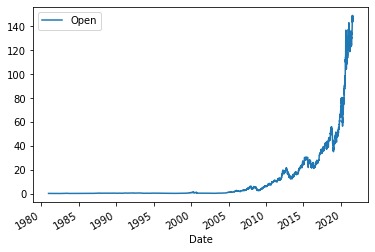

In [215]:
apple_share_price_data.plot(x='Date', y='Open')

In [221]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
Name: Dividends, Length: 72, dtype: float64

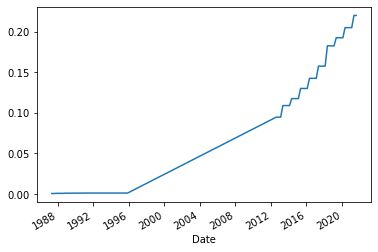

In [222]:
apple.dividends.plot()

### Exercice

Now using the Ticker module create an object for AMD (Advanced Micro Devices) with the ticker symbol is AMD called; name the object amd

In [223]:
amd = yf.Ticker('AMD')

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


In [225]:
amd_info = amd.info
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 12600,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides x86 microprocessors for desktop PCs under the AMD Ryzen, AMD Ryzen PRO, Ryzen, Threadripper, AMD A-Series, AMD FX, AMD Athlon, AMD Athlon PRO, and AMD Pro A-Series processors brands; microprocessors for notebook and 2-in-1s under the AMD Ryzen, AMD A-Series, AMD Athlon, AMD Ryzen PRO, AMD Athlon PRO, and AMD Pro A-Series processors brands; microprocessors f

In [226]:
amd_info['country']

'United States'

In [227]:
amd_info['sector']

'Technology'

<b>Question 3</b> Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


In [ ]:
amd_share_price_data = amd.history(period='max')
amd_share_price_data.head()

In [230]:
amd_share_price_data.reset_index(inplace=True)

In [231]:
amd_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-03-17,0.0,3.302083,3.125000,3.145833,219600,0,0.0
1,1980-03-18,0.0,3.125000,2.937500,3.031250,727200,0,0.0
2,1980-03-19,0.0,3.083333,3.020833,3.041667,295200,0,0.0
3,1980-03-20,0.0,3.062500,3.010417,3.010417,159600,0,0.0
4,1980-03-21,0.0,3.020833,2.906250,2.916667,130800,0,0.0


In [233]:
amd_share_price_data.Volume[0]

219600

# Extracting data using web scraping

First we must use the `request` library to downlaod the webpage, and extract the text. We will extract Netflix stock data <https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html>.


In [240]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [241]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

Next we must parse the text into html using `beautiful_soup`

In [243]:
data = requests.get(url).text
soup = BeautifulSoup(data, 'html5lib')

In [252]:
soup.find('tbody').find_all('tr')

[<tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="51"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="52"><span data-reactid="53">Jun 01, 2021</span></td><td class="Py(10px) Pstart(10px)" data-reactid="54"><span data-reactid="55">504.01</span></td><td class="Py(10px) Pstart(10px)" data-reactid="56"><span data-reactid="57">536.13</span></td><td class="Py(10px) Pstart(10px)" data-reactid="58"><span data-reactid="59">482.14</span></td><td class="Py(10px) Pstart(10px)" data-reactid="60"><span data-reactid="61">528.21</span></td><td class="Py(10px) Pstart(10px)" data-reactid="62"><span data-reactid="63">528.21</span></td><td class="Py(10px) Pstart(10px)" data-reactid="64"><span data-reactid="65">78,560,600</span></td></tr>,
 <tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="66"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="67"><span data-reactid="68">May 01, 2021</span></td><td class="Py(10px) Pstart(10px)" data-reactid="69"><

In [253]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [254]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


we can also use the pandas **read_html** function

In [255]:
read_html_pandas_data=pd.read_html(url)

In [257]:
netflix_df = read_html_pandas_data[0]

In [260]:
netflix_df.drop(index=70, axis=0, inplace=True)

In [261]:
netflix_df

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300
...,...,...,...,...,...,...,...
65,"Jan 01, 2016",109.00,122.18,90.11,91.84,91.84,488193200
66,"Dec 01, 2015",124.47,133.27,113.85,114.38,114.38,319939200
67,"Nov 01, 2015",109.20,126.60,101.86,123.33,123.33,320321800
68,"Oct 01, 2015",102.91,115.83,96.26,108.38,108.38,446204400


In [262]:
url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html'

In [264]:
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html5lib')

In [307]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [309]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,528,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,556,200","3,256.93"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,226,100","3,036.15"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,899,300","3,148.73"


In [313]:
amzon_html_data=pd.read_html(url)[0]

In [315]:
amzon_html_data.drop(index=61, axis=0, inplace=True)

In [317]:
amzon_html_data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jan 01, 2021",3270.00,3363.89,3086.00,3206.20,3206.20,71528900
1,"Dec 01, 2020",3188.50,3350.65,3072.82,3256.93,3256.93,77556200
2,"Nov 01, 2020",3061.74,3366.80,2950.12,3168.04,3168.04,90810500
3,"Oct 01, 2020",3208.00,3496.24,3019.00,3036.15,3036.15,116226100
4,"Sep 01, 2020",3489.58,3552.25,2871.00,3148.73,3148.73,115899300


In [318]:
amazon_data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
56,"May 01, 2016",663.92,724.23,656.00,722.79,"90,614,500",722.79
57,"Apr 01, 2016",590.49,669.98,585.25,659.59,"78,464,200",659.59
58,"Mar 01, 2016",556.29,603.24,538.58,593.64,"94,009,500",593.64
59,"Feb 01, 2016",578.15,581.80,474.00,552.52,"124,144,800",552.52
60,"Jan 01, 2016",656.29,657.72,547.18,587.00,"130,200,900",587.00


In [320]:
amzon_html_data.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
56,"May 01, 2016",663.92,724.23,656.00,722.79,722.79,90614500
57,"Apr 01, 2016",590.49,669.98,585.25,659.59,659.59,78464200
58,"Mar 01, 2016",556.29,603.24,538.58,593.64,593.64,94009500
59,"Feb 01, 2016",578.15,581.80,474.00,552.52,552.52,124144800
60,"Jan 01, 2016",656.29,657.72,547.18,587.00,587.00,130200900


In [321]:
amzon_html_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')

In [322]:
amazon_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')